In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
#Import the API Key
from config import weather_api_key

#Import the requests library
import requests

# Import the time module.
import time


In [2]:
# Get today's date in seconds.
today = time.time()
today

1633794844.5447273

In [3]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b91b79ebe9cb8169ca7d3f9b9091d8f2


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
#Import the requests library
import requests

#Import the API Key
#from config import weather_api_key

#Import datetime module from datetime library
from datetime import datetime



In [8]:
#RETRIEVE WEATHER FROM LIST OF CITIES
#Create an emty list to hold the weather dat
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | port-gentil
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | marcona
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | 

Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | hilo
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | sataua
City not found. Skipping...
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | santa isabel do rio negro
Processing Record 48 of Set 4 | santo antonio do ica
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 4 | seoul
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | lagos
Processing Record 3 of Set 5 | sydney
Processing Record 4 of Set 5 | aloleng
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | rio gallegos
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | cozumel
Processing Record 10 of Set 5 | kabalo
Processing Record 11 of Set 5 | pravia
Processing Record 12 of Set 5 | am

Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | vrangel
Processing Record 33 of Set 8 | caucaia
Processing Record 34 of Set 8 | la asuncion
Processing Record 35 of Set 8 | montemorelos
Processing Record 36 of Set 8 | nurota
Processing Record 37 of Set 8 | acapulco
Processing Record 38 of Set 8 | bukachacha
Processing Record 39 of Set 8 | asayita
City not found. Skipping...
Processing Record 40 of Set 8 | aykhal
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | nakhon phanom
Processing Record 44 of Set 8 | karratha
Processing Record 45 of Set 8 | saryg-sep
Processing Record 46 of Set 8 | conde
Processing Record 47 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 8 | kirakira
Processing Record 49 of Set 8 | madinat sittah uktubar
Processing Record 50 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 9 | luklukan
P

Processing Record 18 of Set 12 | maningrida
Processing Record 19 of Set 12 | loandjili
Processing Record 20 of Set 12 | bocaranga
City not found. Skipping...
Processing Record 21 of Set 12 | el cobre
Processing Record 22 of Set 12 | okandja
City not found. Skipping...
Processing Record 23 of Set 12 | xuddur
Processing Record 24 of Set 12 | tahlequah
Processing Record 25 of Set 12 | batemans bay
Processing Record 26 of Set 12 | ahtopol
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | ullapool
Processing Record 29 of Set 12 | carutapera
Processing Record 30 of Set 12 | vuktyl
Processing Record 31 of Set 12 | todos santos
Processing Record 32 of Set 12 | alyth
Processing Record 33 of Set 12 | klaksvik
Processing Record 34 of Set 12 | nishihara
Processing Record 35 of Set 12 | birobidzhan
Processing Record 36 of Set 12 | gravdal
Processing Record 37 of Set 12 | yumen
Processing Record 38 of Set 12 | mildura
Processing Record 39 of Set 12 | minudasht
Processing 

In [9]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,32.16,100,90,2.30,CA,2021-10-09 15:54:07
1,Qaanaaq,77.4840,-69.3632,25.32,94,100,11.39,GL,2021-10-09 15:54:07
2,Yellowknife,62.4560,-114.3525,42.42,100,90,1.01,CA,2021-10-09 15:51:47
3,Ancud,-41.8697,-73.8203,60.33,70,1,7.05,CL,2021-10-09 15:54:08
4,Tura,25.5198,90.2201,74.35,84,0,2.30,IN,2021-10-09 15:54:08
5,Whitehorse,60.7161,-135.0538,36.37,74,40,15.99,CA,2021-10-09 15:54:08
6,Atuona,-9.8000,-139.0333,77.72,71,14,19.06,PF,2021-10-09 15:54:09
7,Port-Gentil,-0.7193,8.7815,78.76,89,90,12.66,GA,2021-10-09 15:54:09
8,Ushuaia,-54.8000,-68.3000,46.06,61,75,14.97,AR,2021-10-09 15:54:10
9,Asau,46.4333,26.4000,50.76,53,98,4.81,RO,2021-10-09 15:54:10


In [10]:
#REORDER COLUMNS
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-10-09 15:54:07,55.7435,-97.8558,32.16,100,90,2.30
1,Qaanaaq,GL,2021-10-09 15:54:07,77.4840,-69.3632,25.32,94,100,11.39
2,Yellowknife,CA,2021-10-09 15:51:47,62.4560,-114.3525,42.42,100,90,1.01
3,Ancud,CL,2021-10-09 15:54:08,-41.8697,-73.8203,60.33,70,1,7.05
4,Tura,IN,2021-10-09 15:54:08,25.5198,90.2201,74.35,84,0,2.30
...,...,...,...,...,...,...,...,...,...
546,La Sarre,CA,2021-10-09 16:00:24,48.8002,-79.1996,59.50,78,98,7.05
547,Shebunino,RU,2021-10-09 16:00:24,46.4339,141.8603,55.18,76,94,11.07
548,North Battleford,CA,2021-10-09 16:00:25,52.7834,-108.2847,47.41,35,8,4.54
549,Constitucion,CL,2021-10-09 16:00:25,-35.3333,-72.4167,59.23,67,1,6.04


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#CREATE SCATTER PLOT FROM CITY_DATA_DF
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


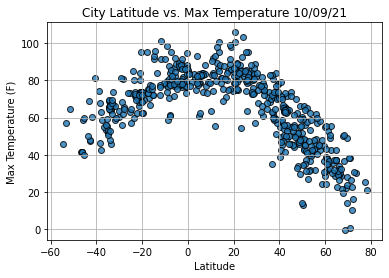

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

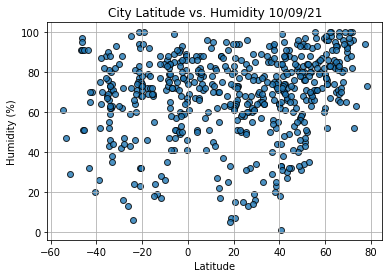

In [14]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

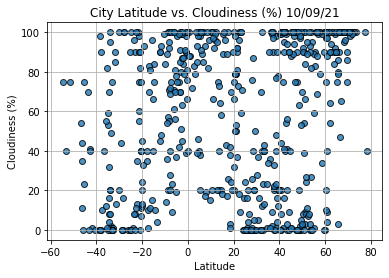

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

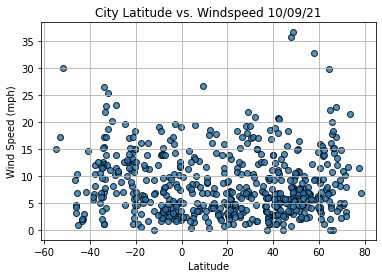

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
#filter based on specific row [13] is the 13th row
index13=city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2021-10-09 15:54:11
Lat                        42.097
Lng                      -79.2353
Max Temp                    65.52
Humidity                       95
Cloudiness                     90
Wind Speed                  11.01
Name: 13, dtype: object

In [19]:
#filter by column
#Create Northern and Southern Hemisphere Dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]


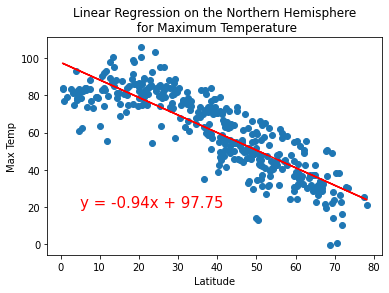

In [20]:
#NORTHERN HEMISPHERE
#set the parameters within the linear regression function
#note the x_values and y_values refer to the column name in the dataframe for northern_hemi_df
#note the last parameters (5,20) represent the location for the equation on the chart. 5= x_axis, 20 = y_axis
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(5,20))

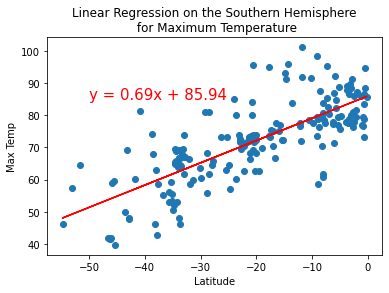

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,85))

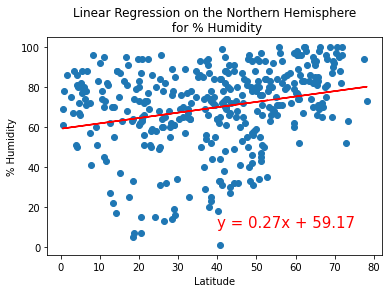

In [27]:
#Linear regression NORTHERN HEMISPHERE LAT vs Humitity using the plot_linear_regression funtion created earlier
# Linear regression on the Northern Hemisphere
#defne fhte values for x and y 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function. Populate the parameters of the function 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

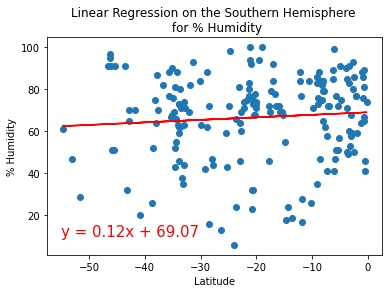

In [32]:
# Linear regression on the SOUTHERN Hemisphere LAT vs Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))

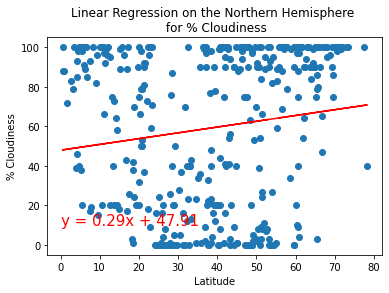

In [34]:
# Linear regression on the NORTHERN Hemisphere LAT vs cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,10))

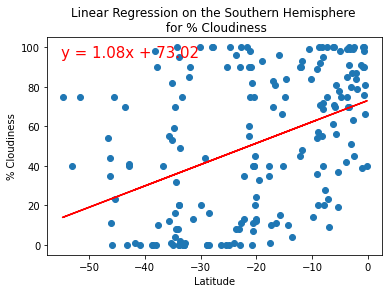

In [38]:
# Linear regression on the SOUTHERN Hemisphere LAT vs cloudiness 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,95))

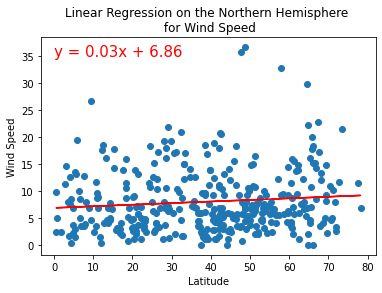

In [42]:
# Linear regression on the NORTHERN Hemisphere LAT vs wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,35))

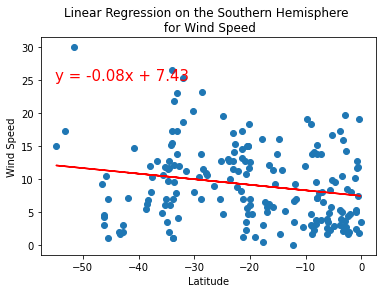

In [44]:
# Linear regression on the SOUTHERN Hemisphere LAT vs wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,25))